# Topics covered

### Load a kaggle dataset
### Plot histogram and bell curve
### use 3 standard deviation to remove outlers
### Use Z scores to remove outliers
### Exercise

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [4]:
df = pd.read_csv('D:\\Data Science\\Code basics\\py-master\\ML\\FeatureEngineering\\2_outliers_z_score\\heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


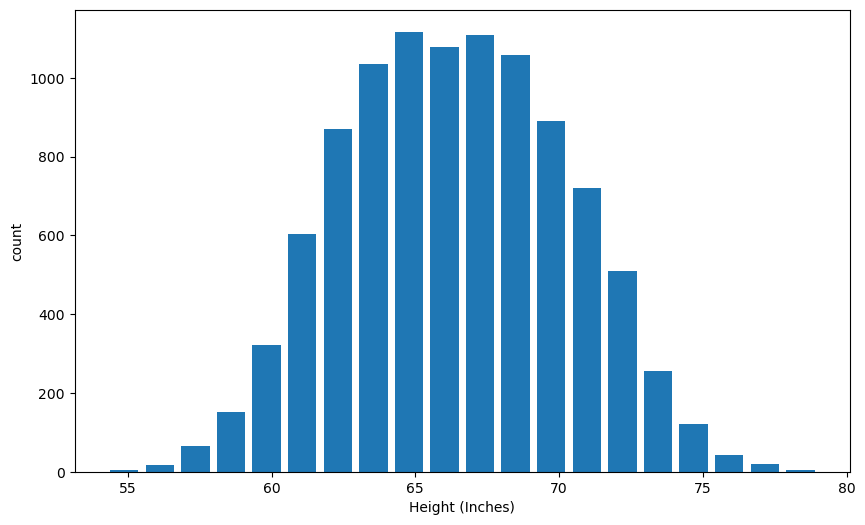

In [5]:
## Plottting ghe histogram to understand

plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (Inches)')
plt.ylabel('count')
plt.show()

In [7]:
df.height.min() # minimum height in the dataset

54.26313333

In [8]:
df.height.max() # maximum

78.99874235

In [9]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


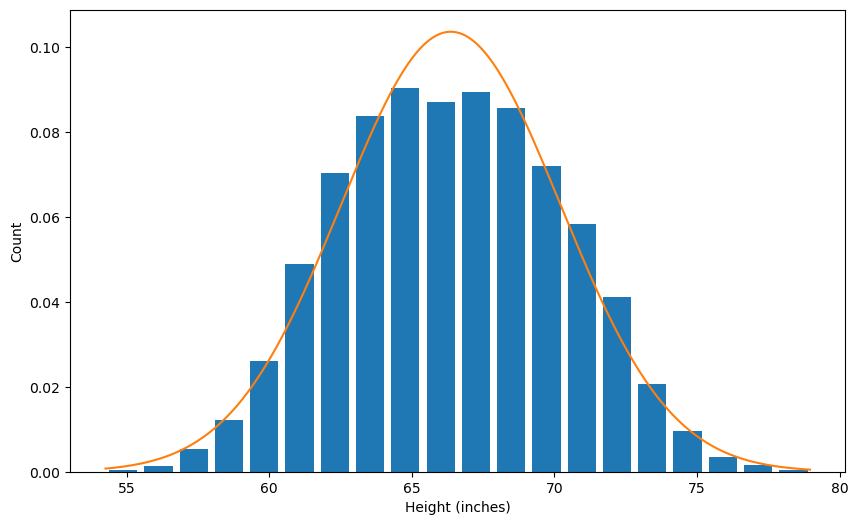

In [11]:
from scipy.stats import norm
import numpy as np

plt.hist(df.height, bins=20, rwidth=0.8, density = True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

# it shows the bell curve

In [12]:
df.height.mean()

66.367559754866

In [13]:
df.height.std()

3.847528120795573

## Outlier detection and removal using 3 Std Dev

In [14]:
## we want point of mean and 3 std dev above the mean

upper_limit = df.height.mean() + 3* df.height.std()
upper_limit

77.91014411725271

In [16]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

54.824975392479274

In [18]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


### now remove these outliers using std dev and generate new df

In [20]:
no_outlier = df[(df.height<upper_limit) & (df.height>lower_limit)]
no_outlier

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [21]:
no_outlier.shape

(9993, 2)

In [23]:
### for comparing how many outliers are removed from the dataset

df.shape[0] - no_outlier.shape[0]

## we have removed 7 outliers

7

In [24]:
df.shape

(10000, 2)

## Outlier detection and removal using Z-Score


Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

In [25]:
df['zscore'] = (df.height - df.height.mean())/df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


### We can remove the z-score above or below 3

In [26]:
df[df.zscore > 3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [28]:
df[df.zscore < -3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [29]:
df[(df.zscore > 3) | (df.zscore < -3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [30]:
### removing the outlier and creating a new df

no_outlier = df[(df.zscore > -3) & (df.zscore < 3)]
no_outlier.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [31]:
# comparing it with original dataset

df.shape[0] - no_outlier.shape[0]

7